**Генерирање на податочно множество од симулирани бранови - NSBH бранови**

Во овој код се креира template bank, односно се креира листа од примероци кои подоцна ќе се користат како дополнителни симулирани гравитациони бранови (примероци) за CNN мрежата. Избраните параметри за template bank - NSBH сигнали се следните:

масата на црната дупка од 5 до 35 соларни маси со чекор 1
масата на неутронската ѕвезда од 1 до 2.5 соларни маси со чекор 0.1
вредности на спинот од -0.8 до 0.8 со чекор 0.4

In [2]:
! pip install -q 'lalsuite==7.11' 'PyCBC==2.0.5'

In [3]:
import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
import pycbc.catalog
from pycbc.types import TimeSeries
import numpy as np
import pandas as pd
import os
from pycbc.waveform import get_td_waveform
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.filter import matched_filter
from pycbc.filter import sigma

In [4]:
BH_masses_NSBH = []

start_mass = 5
end_mass = 35

step = 1

current_mass = start_mass
while current_mass <= end_mass:
    BH_masses_NSBH.append(current_mass)
    current_mass += step

In [5]:
NS_masses = []

start_mass = 1
end_mass = 2.5

step = 0.1

current_mass = start_mass
while current_mass <= end_mass:
    NS_masses.append(current_mass)
    current_mass += step

In [6]:
spins = []

start_spin = -0.8
end_spin = 0.8

step = 0.4

current_spin = start_spin
while current_spin <= end_spin:
    spins.append(current_spin)
    current_spin += step

In [6]:
templates_NSBH_1 = []

In [7]:
m1 = BH_masses_NSBH[0] #m1=5
for m2 in np.arange(1, 2.5, 0.1):
    mass_ratio = m1/m2
    if mass_ratio <= 10:
        for spin1 in spins:
            for spin2 in spins:
                hp, hc = get_td_waveform(approximant="TaylorF2",
                     mass1=m1,
                     mass2=m2,
                     spin1x=0,
                     spin1y=0,
                     spin1z=spin1,
                     spin2x=0,
                     spin2y=0,
                     spin2z=spin2,                    
                     delta_t=1.0/2048,
                     f_lower=10)
                waveform = hp.numpy()
                templates_NSBH_1.append(waveform)

In [8]:
print(len(templates_NSBH_1))

375


In [9]:
print(templates_NSBH_1[0].size)

4194304


In [10]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_1:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_1 = modified_waveforms

In [11]:
print(len(templates_NSBH_1[0]))

2048


In [12]:
ts = TimeSeries(templates_NSBH_1[0], delta_t=1.0/2048)

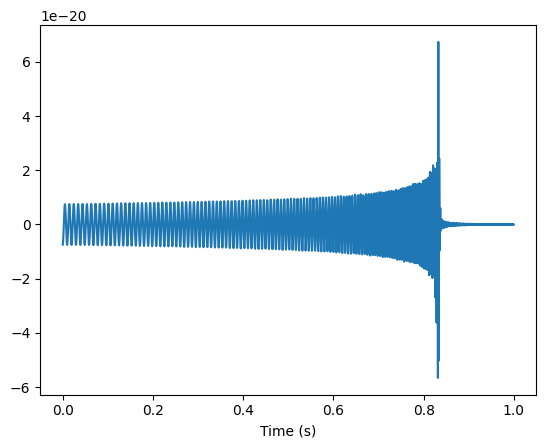

In [13]:
pylab.plot(ts.sample_times, ts)
pylab.xlabel('Time (s)')
pylab.show()

In [14]:
output_dir = '/kaggle/working/NSBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_1 = []
event_targets_1 = []

i = 0

for waveform in templates_NSBH_1:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_1.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_1.append('NSBH')

  i = i+1

labels = np.array([event_paths_1, event_targets_1]).T
np.save(os.path.join(output_dir, 'labels1.npy'), labels)

In [15]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events", 'zip', output_dir)

'/kaggle/working/NSBH_events.zip'

In [16]:
print(i)

375


In [24]:
i = 375

In [18]:
templates_NSBH_2 = []

In [20]:
m1 = BH_masses_NSBH[1] #m1=6
for m2 in np.arange(1, 2.5, 0.1):
    mass_ratio = m1/m2
    if mass_ratio <= 10:
        for spin1 in spins:
            for spin2 in spins:
                hp, hc = get_td_waveform(approximant="TaylorF2",
                     mass1=m1,
                     mass2=m2,
                     spin1x=0,
                     spin1y=0,
                     spin1z=spin1,
                     spin2x=0,
                     spin2y=0,
                     spin2z=spin2,                    
                     delta_t=1.0/2048,
                     f_lower=10)
                waveform = hp.numpy()
                templates_NSBH_2.append(waveform)

In [21]:
print(len(templates_NSBH_2))

375


In [22]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_2:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_2 = modified_waveforms

In [23]:
print(len(templates_NSBH_2[0]))

2048


In [25]:
output_dir = '/kaggle/working/NSBH_events2'
os.makedirs(output_dir, exist_ok=True)

event_paths_2 = []
event_targets_2 = []


for waveform in templates_NSBH_2:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_2.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_2.append('NSBH')

  i = i+1

labels = np.array([event_paths_2, event_targets_2]).T
np.save(os.path.join(output_dir, 'labels2.npy'), labels)

In [26]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events2", 'zip', output_dir)

'/kaggle/working/NSBH_events2.zip'

In [27]:
print(i)

750


In [28]:
i = 750

In [29]:
templates_NSBH_3 = []

In [30]:
m1 = BH_masses_NSBH[2] #m1=7
for m2 in np.arange(1, 2.5, 0.1):
    mass_ratio = m1/m2
    if mass_ratio <= 10:
        for spin1 in spins:
            for spin2 in spins:
                hp, hc = get_td_waveform(approximant="TaylorF2",
                     mass1=m1,
                     mass2=m2,
                     spin1x=0,
                     spin1y=0,
                     spin1z=spin1,
                     spin2x=0,
                     spin2y=0,
                     spin2z=spin2,                    
                     delta_t=1.0/2048,
                     f_lower=10)
                waveform = hp.numpy()
                templates_NSBH_3.append(waveform)

In [32]:
print(len(templates_NSBH_3))

375


In [33]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_3:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_3 = modified_waveforms

In [34]:
print(len(templates_NSBH_3[0]))

2048


In [35]:
output_dir = '/kaggle/working/NSBH_events3'
os.makedirs(output_dir, exist_ok=True)

event_paths_3 = []
event_targets_3 = []


for waveform in templates_NSBH_3:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_3.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_3.append('NSBH')

  i = i+1

labels = np.array([event_paths_3, event_targets_3]).T
np.save(os.path.join(output_dir, 'labels3.npy'), labels)

In [36]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events3", 'zip', output_dir)

'/kaggle/working/NSBH_events3.zip'

In [37]:
print(i)

1125


In [38]:
i = 1125

In [39]:
templates_NSBH_4 = []

In [40]:
m1 = BH_masses_NSBH[3] #m1=8
for m2 in np.arange(1, 2.5, 0.1):
    mass_ratio = m1/m2
    if mass_ratio <= 10:
        for spin1 in spins:
            for spin2 in spins:
                hp, hc = get_td_waveform(approximant="TaylorF2",
                     mass1=m1,
                     mass2=m2,
                     spin1x=0,
                     spin1y=0,
                     spin1z=spin1,
                     spin2x=0,
                     spin2y=0,
                     spin2z=spin2,                    
                     delta_t=1.0/2048,
                     f_lower=10)
                waveform = hp.numpy()
                templates_NSBH_4.append(waveform)

In [41]:
print(len(templates_NSBH_4))

375


In [42]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_4:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_4 = modified_waveforms

In [43]:
print(len(templates_NSBH_4[0]))

2048


In [44]:
output_dir = '/kaggle/working/NSBH_events4'
os.makedirs(output_dir, exist_ok=True)

event_paths_4 = []
event_targets_4 = []


for waveform in templates_NSBH_4:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_4.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_4.append('NSBH')

  i = i+1

labels = np.array([event_paths_4, event_targets_4]).T
np.save(os.path.join(output_dir, 'labels4.npy'), labels)

In [45]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events4", 'zip', output_dir)

'/kaggle/working/NSBH_events4.zip'

In [46]:
print(i)

1500


In [47]:
i = 1500

In [48]:
templates_NSBH_5 = []

In [49]:
m1 = BH_masses_NSBH[4] #m1=9
for m2 in np.arange(1, 2.5, 0.1):
    mass_ratio = m1/m2
    if mass_ratio <= 10:
        for spin1 in spins:
            for spin2 in spins:
                hp, hc = get_td_waveform(approximant="TaylorF2",
                     mass1=m1,
                     mass2=m2,
                     spin1x=0,
                     spin1y=0,
                     spin1z=spin1,
                     spin2x=0,
                     spin2y=0,
                     spin2z=spin2,                    
                     delta_t=1.0/2048,
                     f_lower=10)
                waveform = hp.numpy()
                templates_NSBH_5.append(waveform)

In [51]:
print(len(templates_NSBH_5))

375


In [52]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_5:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_5 = modified_waveforms

In [53]:
print(len(templates_NSBH_5[0]))

2048


In [54]:
output_dir = '/kaggle/working/NSBH_events5'
os.makedirs(output_dir, exist_ok=True)

event_paths_5 = []
event_targets_5 = []


for waveform in templates_NSBH_5:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_5.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_5.append('NSBH')

  i = i+1

labels = np.array([event_paths_5, event_targets_5]).T
np.save(os.path.join(output_dir, 'labels5.npy'), labels)

In [55]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events5", 'zip', output_dir)

'/kaggle/working/NSBH_events5.zip'

In [56]:
print(i)

1875


In [57]:
i = 1875

In [58]:
templates_NSBH_6 = []

In [59]:
m1 = BH_masses_NSBH[5] #m1=10
for m2 in np.arange(1, 2.5, 0.1):
    mass_ratio = m1/m2
    if mass_ratio <= 10:
        for spin1 in spins:
            for spin2 in spins:
                hp, hc = get_td_waveform(approximant="TaylorF2",
                     mass1=m1,
                     mass2=m2,
                     spin1x=0,
                     spin1y=0,
                     spin1z=spin1,
                     spin2x=0,
                     spin2y=0,
                     spin2z=spin2,                    
                     delta_t=1.0/2048,
                     f_lower=10)
                waveform = hp.numpy()
                templates_NSBH_6.append(waveform)

In [60]:
print(len(templates_NSBH_6))

375


In [61]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_6:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_6 = modified_waveforms

In [62]:
print(len(templates_NSBH_6[0]))

2048


In [63]:
output_dir = '/kaggle/working/NSBH_events6'
os.makedirs(output_dir, exist_ok=True)

event_paths_6 = []
event_targets_6 = []


for waveform in templates_NSBH_6:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_6.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_6.append('NSBH')

  i = i+1

labels = np.array([event_paths_6, event_targets_6]).T
np.save(os.path.join(output_dir, 'labels6.npy'), labels)

In [64]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events6", 'zip', output_dir)

'/kaggle/working/NSBH_events6.zip'

In [65]:
print(i)

2250


In [23]:
i = 2250

In [24]:
templates_NSBH_7 = []

In [25]:
m1 = BH_masses_NSBH[6] #m1=11
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_7.append(waveform)

In [26]:
print(len(templates_NSBH_7))

375


In [27]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_7:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_7 = modified_waveforms

In [28]:
print(len(templates_NSBH_7[0]))

2048


In [29]:
output_dir = '/kaggle/working/NSBH_events7'
os.makedirs(output_dir, exist_ok=True)

event_paths_7 = []
event_targets_7 = []


for waveform in templates_NSBH_7:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_7.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_7.append('NSBH')

  i = i+1

labels = np.array([event_paths_7, event_targets_7]).T
np.save(os.path.join(output_dir, 'labels7.npy'), labels)

In [31]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events7", 'zip', output_dir)

'/kaggle/working/NSBH_events7.zip'

In [32]:
print(i)

2625


In [33]:
i = 2625

In [34]:
templates_NSBH_8 = []

In [35]:
m1 = BH_masses_NSBH[7] #m1=12
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_8.append(waveform)

In [36]:
print(len(templates_NSBH_8))

375


In [37]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_8:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_8 = modified_waveforms

In [38]:
print(len(templates_NSBH_8[0]))

2048


In [39]:
output_dir = '/kaggle/working/NSBH_events8'
os.makedirs(output_dir, exist_ok=True)

event_paths_8 = []
event_targets_8 = []


for waveform in templates_NSBH_8:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_8.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_8.append('NSBH')

  i = i+1

labels = np.array([event_paths_8, event_targets_8]).T
np.save(os.path.join(output_dir, 'labels8.npy'), labels)

In [40]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events8", 'zip', output_dir)

'/kaggle/working/NSBH_events8.zip'

In [41]:
print(i)

3000


In [42]:
i = 3000

In [43]:
templates_NSBH_9 = []

In [44]:
m1 = BH_masses_NSBH[8] #m1=13
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_9.append(waveform)

In [45]:
print(len(templates_NSBH_9))

375


In [46]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_9:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_9 = modified_waveforms

In [47]:
print(len(templates_NSBH_9[0]))

2048


In [48]:
output_dir = '/kaggle/working/NSBH_events9'
os.makedirs(output_dir, exist_ok=True)

event_paths_9 = []
event_targets_9 = []


for waveform in templates_NSBH_9:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_9.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_9.append('NSBH')

  i = i+1

labels = np.array([event_paths_9, event_targets_9]).T
np.save(os.path.join(output_dir, 'labels9.npy'), labels)

In [49]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events9", 'zip', output_dir)

'/kaggle/working/NSBH_events9.zip'

In [50]:
print(i)

3375


In [51]:
i = 3375

In [52]:
templates_NSBH_10 = []

In [53]:
m1 = BH_masses_NSBH[9] #m1=14
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_10.append(waveform)

In [54]:
print(len(templates_NSBH_10))

375


In [55]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_10:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_10 = modified_waveforms

In [56]:
print(len(templates_NSBH_10[0]))

2048


In [57]:
output_dir = '/kaggle/working/NSBH_events10'
os.makedirs(output_dir, exist_ok=True)

event_paths_10 = []
event_targets_10 = []


for waveform in templates_NSBH_10:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_10.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_10.append('NSBH')

  i = i+1

labels = np.array([event_paths_10, event_targets_10]).T
np.save(os.path.join(output_dir, 'labels10.npy'), labels)

In [58]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events10", 'zip', output_dir)

'/kaggle/working/NSBH_events10.zip'

In [59]:
print(i)

3750


In [60]:
i = 3750

In [61]:
templates_NSBH_11 = []

In [62]:
m1 = BH_masses_NSBH[10] #m1=15
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_11.append(waveform)

In [63]:
print(len(templates_NSBH_11))

375


In [64]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_11:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_11 = modified_waveforms

In [65]:
print(len(templates_NSBH_11[0]))

2048


In [66]:
output_dir = '/kaggle/working/NSBH_events11'
os.makedirs(output_dir, exist_ok=True)

event_paths_11 = []
event_targets_11 = []


for waveform in templates_NSBH_11:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_11.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_11.append('NSBH')

  i = i+1

labels = np.array([event_paths_11, event_targets_11]).T
np.save(os.path.join(output_dir, 'labels11.npy'), labels)

In [67]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events11", 'zip', output_dir)

'/kaggle/working/NSBH_events11.zip'

In [68]:
print(i)

4125


In [69]:
i = 4125

In [70]:
templates_NSBH_12 = []

In [71]:
m1 = BH_masses_NSBH[11] #m1=16
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_12.append(waveform)

In [72]:
print(len(templates_NSBH_12))

375


In [73]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_12:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_12 = modified_waveforms

In [74]:
print(len(templates_NSBH_12[0]))

2048


In [75]:
output_dir = '/kaggle/working/NSBH_events12'
os.makedirs(output_dir, exist_ok=True)

event_paths_12 = []
event_targets_12 = []


for waveform in templates_NSBH_12:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_12.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_12.append('NSBH')

  i = i+1

labels = np.array([event_paths_12, event_targets_12]).T
np.save(os.path.join(output_dir, 'labels12.npy'), labels)

In [76]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events12", 'zip', output_dir)

'/kaggle/working/NSBH_events12.zip'

In [77]:
print(i)

4500


In [78]:
i = 4500

In [79]:
templates_NSBH_13 = []

In [80]:
m1 = BH_masses_NSBH[12] #m1=17
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_13.append(waveform)

In [81]:
print(len(templates_NSBH_13))

375


In [82]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_13:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_13 = modified_waveforms

In [83]:
print(len(templates_NSBH_13[0]))

2048


In [84]:
output_dir = '/kaggle/working/NSBH_events13'
os.makedirs(output_dir, exist_ok=True)

event_paths_13 = []
event_targets_13 = []


for waveform in templates_NSBH_13:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_13.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_13.append('NSBH')

  i = i+1

labels = np.array([event_paths_13, event_targets_13]).T
np.save(os.path.join(output_dir, 'labels13.npy'), labels)

In [85]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events13", 'zip', output_dir)

'/kaggle/working/NSBH_events13.zip'

In [86]:
print(i)

4875


In [87]:
i = 4875

In [88]:
templates_NSBH_14 = []

In [89]:
m1 = BH_masses_NSBH[13] #m1=18
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_14.append(waveform)

In [90]:
print(len(templates_NSBH_14))

375


In [91]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_14:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_14 = modified_waveforms

In [92]:
print(len(templates_NSBH_14[0]))

2048


In [93]:
output_dir = '/kaggle/working/NSBH_events14'
os.makedirs(output_dir, exist_ok=True)

event_paths_14 = []
event_targets_14 = []


for waveform in templates_NSBH_14:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_14.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_14.append('NSBH')

  i = i+1

labels = np.array([event_paths_14, event_targets_14]).T
np.save(os.path.join(output_dir, 'labels14.npy'), labels)

In [94]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events14", 'zip', output_dir)

'/kaggle/working/NSBH_events14.zip'

In [95]:
print(i)

5250


In [96]:
i = 5250

In [97]:
templates_NSBH_15 = []

In [98]:
m1 = BH_masses_NSBH[14] #m1=19
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_15.append(waveform)

In [99]:
print(len(templates_NSBH_15))

375


In [100]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_15:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_15 = modified_waveforms

In [101]:
print(len(templates_NSBH_15[0]))

2048


In [102]:
output_dir = '/kaggle/working/NSBH_events15'
os.makedirs(output_dir, exist_ok=True)

event_paths_15 = []
event_targets_15 = []


for waveform in templates_NSBH_15:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_15.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_15.append('NSBH')

  i = i+1

labels = np.array([event_paths_15, event_targets_15]).T
np.save(os.path.join(output_dir, 'labels15.npy'), labels)

In [103]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events15", 'zip', output_dir)

'/kaggle/working/NSBH_events15.zip'

In [104]:
print(i)

5625


In [105]:
i = 5625

In [106]:
templates_NSBH_16 = []

In [107]:
m1 = BH_masses_NSBH[15] #m1=20
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_16.append(waveform)

In [108]:
print(len(templates_NSBH_16))

375


In [109]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_16:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_16 = modified_waveforms

In [110]:
print(len(templates_NSBH_16[0]))

2048


In [111]:
output_dir = '/kaggle/working/NSBH_events16'
os.makedirs(output_dir, exist_ok=True)

event_paths_16 = []
event_targets_16 = []


for waveform in templates_NSBH_16:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_16.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_16.append('NSBH')

  i = i+1

labels = np.array([event_paths_16, event_targets_16]).T
np.save(os.path.join(output_dir, 'labels16.npy'), labels)

In [112]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events16", 'zip', output_dir)

'/kaggle/working/NSBH_events16.zip'

In [113]:
print(i)

6000


In [7]:
i = 6000

In [8]:
templates_NSBH_17 = []

In [9]:
m1 = BH_masses_NSBH[16] #m1=21
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_17.append(waveform)

In [10]:
print(len(templates_NSBH_17))

375


In [11]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_17:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_17 = modified_waveforms

In [12]:
print(len(templates_NSBH_17[0]))

2048


In [13]:
output_dir = '/kaggle/working/NSBH_events17'
os.makedirs(output_dir, exist_ok=True)

event_paths_17 = []
event_targets_17 = []


for waveform in templates_NSBH_17:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_17.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_17.append('NSBH')

  i = i+1

labels = np.array([event_paths_17, event_targets_17]).T
np.save(os.path.join(output_dir, 'labels17.npy'), labels)

In [14]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events17", 'zip', output_dir)

'/kaggle/working/NSBH_events17.zip'

In [15]:
print(i)

6375


In [16]:
i = 6375

In [17]:
templates_NSBH_18 = []

In [18]:
m1 = BH_masses_NSBH[17] #m1=22
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_18.append(waveform)

In [19]:
print(len(templates_NSBH_18))

375


In [20]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_18:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_18 = modified_waveforms

In [21]:
print(len(templates_NSBH_18[0]))

2048


In [22]:
output_dir = '/kaggle/working/NSBH_events18'
os.makedirs(output_dir, exist_ok=True)

event_paths_18 = []
event_targets_18 = []


for waveform in templates_NSBH_18:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_18.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_18.append('NSBH')

  i = i+1

labels = np.array([event_paths_18, event_targets_18]).T
np.save(os.path.join(output_dir, 'labels18.npy'), labels)

In [23]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events18", 'zip', output_dir)

'/kaggle/working/NSBH_events18.zip'

In [24]:
print(i)

6750


In [25]:
i = 6750

In [26]:
templates_NSBH_19 = []

In [27]:
m1 = BH_masses_NSBH[18] #m1=23
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_19.append(waveform)

In [28]:
print(len(templates_NSBH_19))

375


In [29]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_19:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_19 = modified_waveforms

In [30]:
print(len(templates_NSBH_19[0]))

2048


In [31]:
output_dir = '/kaggle/working/NSBH_events19'
os.makedirs(output_dir, exist_ok=True)

event_paths_19 = []
event_targets_19 = []


for waveform in templates_NSBH_19:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_19.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_19.append('NSBH')

  i = i+1

labels = np.array([event_paths_19, event_targets_19]).T
np.save(os.path.join(output_dir, 'labels19.npy'), labels)

In [32]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events19", 'zip', output_dir)

'/kaggle/working/NSBH_events19.zip'

In [33]:
print(i)

7125


In [34]:
i = 7125

In [35]:
templates_NSBH_20 = []

In [36]:
m1 = BH_masses_NSBH[19] #m1=24
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_20.append(waveform)

In [37]:
print(len(templates_NSBH_20))

375


In [38]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_20:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_20 = modified_waveforms

In [39]:
print(len(templates_NSBH_20[0]))

2048


In [40]:
output_dir = '/kaggle/working/NSBH_events20'
os.makedirs(output_dir, exist_ok=True)

event_paths_20 = []
event_targets_20 = []


for waveform in templates_NSBH_20:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_20.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_20.append('NSBH')

  i = i+1

labels = np.array([event_paths_20, event_targets_20]).T
np.save(os.path.join(output_dir, 'labels20.npy'), labels)

In [41]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events20", 'zip', output_dir)

'/kaggle/working/NSBH_events20.zip'

In [42]:
print(i)

7500


In [43]:
i = 7500

In [44]:
templates_NSBH_21 = []

In [45]:
m1 = BH_masses_NSBH[20] #m1=25
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_21.append(waveform)

In [46]:
print(len(templates_NSBH_21))

375


In [47]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_21:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_21 = modified_waveforms

In [48]:
print(len(templates_NSBH_21[0]))

2048


In [49]:
output_dir = '/kaggle/working/NSBH_events21'
os.makedirs(output_dir, exist_ok=True)

event_paths_21 = []
event_targets_21 = []


for waveform in templates_NSBH_21:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_21.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_21.append('NSBH')

  i = i+1

labels = np.array([event_paths_21, event_targets_21]).T
np.save(os.path.join(output_dir, 'labels21.npy'), labels)

In [50]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events21", 'zip', output_dir)

'/kaggle/working/NSBH_events21.zip'

In [51]:
print(i)

7875


In [52]:
i = 7875

In [54]:
templates_NSBH_22 = []

In [55]:
m1 = BH_masses_NSBH[21] #m1=26
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_22.append(waveform)

In [56]:
print(len(templates_NSBH_22))

375


In [57]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_22:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_22 = modified_waveforms

In [58]:
print(len(templates_NSBH_22[0]))

2048


In [59]:
output_dir = '/kaggle/working/NSBH_events22'
os.makedirs(output_dir, exist_ok=True)

event_paths_22 = []
event_targets_22 = []


for waveform in templates_NSBH_22:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_22.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_22.append('NSBH')

  i = i+1

labels = np.array([event_paths_22, event_targets_22]).T
np.save(os.path.join(output_dir, 'labels22.npy'), labels)

In [60]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events22", 'zip', output_dir)

'/kaggle/working/NSBH_events22.zip'

In [61]:
print(i)

8250


In [62]:
i = 8250

In [63]:
templates_NSBH_23 = []

In [64]:
m1 = BH_masses_NSBH[22] #m1=27
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_23.append(waveform)

In [65]:
print(len(templates_NSBH_23))

375


In [66]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_23:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_23 = modified_waveforms

In [67]:
print(len(templates_NSBH_23[0]))

2048


In [68]:
output_dir = '/kaggle/working/NSBH_events23'
os.makedirs(output_dir, exist_ok=True)

event_paths_23 = []
event_targets_23 = []


for waveform in templates_NSBH_23:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_23.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_23.append('NSBH')

  i = i+1

labels = np.array([event_paths_23, event_targets_23]).T
np.save(os.path.join(output_dir, 'labels23.npy'), labels)

In [69]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events23", 'zip', output_dir)

'/kaggle/working/NSBH_events23.zip'

In [70]:
print(i)

8625


In [71]:
i = 8625

In [72]:
templates_NSBH_24 = []

In [73]:
m1 = BH_masses_NSBH[23] #m1=28
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_24.append(waveform)

In [74]:
print(len(templates_NSBH_24))

375


In [75]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_24:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_24 = modified_waveforms

In [76]:
print(len(templates_NSBH_24[0]))

2048


In [77]:
output_dir = '/kaggle/working/NSBH_events24'
os.makedirs(output_dir, exist_ok=True)

event_paths_24 = []
event_targets_24 = []


for waveform in templates_NSBH_24:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_24.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_24.append('NSBH')

  i = i+1

labels = np.array([event_paths_24, event_targets_24]).T
np.save(os.path.join(output_dir, 'labels24.npy'), labels)

In [78]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events24", 'zip', output_dir)

'/kaggle/working/NSBH_events24.zip'

In [79]:
print(i)

9000


In [80]:
i = 9000

In [81]:
templates_NSBH_25 = []

In [82]:
m1 = BH_masses_NSBH[24] #m1=29
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_25.append(waveform)

In [83]:
print(len(templates_NSBH_25))

375


In [84]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_25:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_25 = modified_waveforms

In [85]:
print(len(templates_NSBH_25[0]))

2048


In [86]:
output_dir = '/kaggle/working/NSBH_events25'
os.makedirs(output_dir, exist_ok=True)

event_paths_25 = []
event_targets_25 = []


for waveform in templates_NSBH_25:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_25.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_25.append('NSBH')

  i = i+1

labels = np.array([event_paths_25, event_targets_25]).T
np.save(os.path.join(output_dir, 'labels25.npy'), labels)

In [87]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events25", 'zip', output_dir)

'/kaggle/working/NSBH_events25.zip'

In [88]:
print(i)

9375


In [89]:
i = 9375

In [90]:
templates_NSBH_26 = []

In [91]:
m1 = BH_masses_NSBH[25] #m1=30
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_26.append(waveform)

In [92]:
print(len(templates_NSBH_26))

375


In [93]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_26:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_26 = modified_waveforms

In [94]:
print(len(templates_NSBH_26[0]))

2048


In [95]:
output_dir = '/kaggle/working/NSBH_events26'
os.makedirs(output_dir, exist_ok=True)

event_paths_26 = []
event_targets_26 = []


for waveform in templates_NSBH_26:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_26.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_26.append('NSBH')

  i = i+1

labels = np.array([event_paths_26, event_targets_26]).T
np.save(os.path.join(output_dir, 'labels26.npy'), labels)

In [96]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events26", 'zip', output_dir)

'/kaggle/working/NSBH_events26.zip'

In [97]:
print(i)

9750


In [98]:
i = 9750

In [99]:
templates_NSBH_27 = []

In [100]:
m1 = BH_masses_NSBH[26] #m1=31
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_27.append(waveform)

In [101]:
print(len(templates_NSBH_27))

375


In [102]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_27:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_27 = modified_waveforms

In [103]:
print(len(templates_NSBH_27[0]))

2048


In [104]:
output_dir = '/kaggle/working/NSBH_events27'
os.makedirs(output_dir, exist_ok=True)

event_paths_27 = []
event_targets_27 = []


for waveform in templates_NSBH_27:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_27.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_27.append('NSBH')

  i = i+1

labels = np.array([event_paths_27, event_targets_27]).T
np.save(os.path.join(output_dir, 'labels27.npy'), labels)

In [105]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events27", 'zip', output_dir)

'/kaggle/working/NSBH_events27.zip'

In [106]:
print(i)

10125


In [107]:
i = 10125

In [108]:
templates_NSBH_28 = []

In [109]:
m1 = BH_masses_NSBH[27] #m1=32
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_28.append(waveform)

In [110]:
print(len(templates_NSBH_28))

375


In [111]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_28:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_28 = modified_waveforms

In [112]:
print(len(templates_NSBH_28[0]))

2048


In [113]:
output_dir = '/kaggle/working/NSBH_events28'
os.makedirs(output_dir, exist_ok=True)

event_paths_28 = []
event_targets_28 = []


for waveform in templates_NSBH_28:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_28.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_28.append('NSBH')

  i = i+1

labels = np.array([event_paths_28, event_targets_28]).T
np.save(os.path.join(output_dir, 'labels28.npy'), labels)

In [114]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events28", 'zip', output_dir)

'/kaggle/working/NSBH_events28.zip'

In [115]:
print(i)

10500


In [116]:
i = 10500

In [117]:
templates_NSBH_29 = []

In [118]:
m1 = BH_masses_NSBH[28] #m1=33
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_29.append(waveform)

In [119]:
print(len(templates_NSBH_29))

375


In [120]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_29:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_29 = modified_waveforms

In [121]:
print(len(templates_NSBH_29[0]))

2048


In [122]:
output_dir = '/kaggle/working/NSBH_events29'
os.makedirs(output_dir, exist_ok=True)

event_paths_29 = []
event_targets_29 = []


for waveform in templates_NSBH_29:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_29.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_29.append('NSBH')

  i = i+1

labels = np.array([event_paths_29, event_targets_29]).T
np.save(os.path.join(output_dir, 'labels29.npy'), labels)

In [123]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events29", 'zip', output_dir)

'/kaggle/working/NSBH_events29.zip'

In [124]:
print(i)

10875


In [125]:
i = 10875

In [126]:
templates_NSBH_30 = []

In [127]:
m1 = BH_masses_NSBH[29] #m1=34
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_30.append(waveform)

In [128]:
print(len(templates_NSBH_30))

375


In [129]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_30:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_30 = modified_waveforms

In [130]:
print(len(templates_NSBH_30[0]))

2048


In [131]:
output_dir = '/kaggle/working/NSBH_events30'
os.makedirs(output_dir, exist_ok=True)

event_paths_30 = []
event_targets_30 = []


for waveform in templates_NSBH_30:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_30.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_30.append('NSBH')

  i = i+1

labels = np.array([event_paths_30, event_targets_30]).T
np.save(os.path.join(output_dir, 'labels30.npy'), labels)

In [132]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events30", 'zip', output_dir)

'/kaggle/working/NSBH_events30.zip'

In [133]:
print(i)

11250


In [134]:
i = 11250

In [135]:
templates_NSBH_31 = []

In [136]:
m1 = BH_masses_NSBH[30] #m1=35
for m2 in np.arange(1, 2.5, 0.1):
    for spin1 in spins:
        for spin2 in spins:
            hp, hc = get_td_waveform(approximant="TaylorF2",
                    mass1=m1,
                    mass2=m2,
                    spin1x=0,
                    spin1y=0,
                    spin1z=spin1,
                    spin2x=0,
                    spin2y=0,
                    spin2z=spin2,                    
                    delta_t=1.0/2048,
                    f_lower=10)
            waveform = hp.numpy()
            templates_NSBH_31.append(waveform)

In [137]:
print(len(templates_NSBH_31))

375


In [138]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_NSBH_31:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_NSBH_31 = modified_waveforms

In [139]:
print(len(templates_NSBH_31[0]))

2048


In [140]:
output_dir = '/kaggle/working/NSBH_events31'
os.makedirs(output_dir, exist_ok=True)

event_paths_31 = []
event_targets_31 = []


for waveform in templates_NSBH_31:
  event_name = f'NSBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_31.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_31.append('NSBH')

  i = i+1

labels = np.array([event_paths_31, event_targets_31]).T
np.save(os.path.join(output_dir, 'labels31.npy'), labels)

In [141]:
import shutil

shutil.make_archive("/kaggle/working/NSBH_events31", 'zip', output_dir)

'/kaggle/working/NSBH_events31.zip'

In [142]:
print(i)

11625
